# basketball player sorting miniproject

* 데이터 출처 : Kaggle

* 농구 선수 기량 데이터를 바탕으로 5년 이상 & 이하를 구분
* knn을 활용한다

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv("./data/chap11_basketball_final.csv")
df.head()

,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,4.1,1.9,0.4,0.4,1.3,0
1,2.4,3.7,1.1,0.5,1.6,0
2,2.2,1.0,0.5,0.3,1.0,0
3,1.9,0.8,0.6,0.1,1.0,1
4,2.5,0.3,0.3,0.4,0.8,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rebounds   1340 non-null   float64
 1   Assists    1340 non-null   float64
 2   Steals     1340 non-null   float64
 3   Blocks     1340 non-null   float64
 4   Turnovers  1340 non-null   float64
 5   Target     1340 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


* 5년 미만 선수가 약 500명, 5년 이상 선수가 약 800명 정도로 이루어져있다

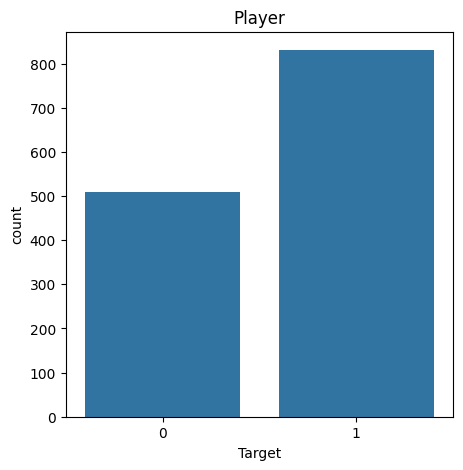

In [9]:
plt.figure(1, figsize=(5,5))
sns.countplot(x = df['Target'])
plt.title("Player")
plt.show()

* 경력 5년 이상인 선수는 대부분 5년 미만인 선수보다 지표가 높은 편임을 확인할 수 있다

In [11]:
df['Rebounds'].groupby(df['Target']).mean()

Target
0    2.247544
1    3.516486
Name: Rebounds, dtype: float64

In [13]:
df['Assists'].groupby(df['Target']).mean()

Target
0    1.221022
1    1.752347
Name: Assists, dtype: float64

In [15]:
df['Steals'].groupby(df['Target']).mean()

Target
0    0.498232
1    0.692178
Name: Steals, dtype: float64

In [17]:
df['Blocks'].groupby(df['Target']).mean()

Target
0    0.253438
1    0.439110
Name: Blocks, dtype: float64

In [19]:
df['Turnovers'].groupby(df['Target']).mean()

Target
0    0.942240
1    1.347533
Name: Turnovers, dtype: float64

## KNN

In [29]:
from sklearn.model_selection import train_test_split

X = df[['Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((1072, 5), (268, 5))

In [31]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=5, scoring = "accuracy")
for i in range(scores.size):
    print(f"{i+1} 번째 정확도 : {scores[i]}")

1 번째 정확도 : 0.6492537313432836
2 번째 정확도 : 0.6119402985074627
3 번째 정확도 : 0.5708955223880597
4 번째 정확도 : 0.6082089552238806
5 번째 정확도 : 0.6455223880597015


In [33]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
print(neigh.classes_)
print(f"거리 계산 방법 : {neigh.effective_metric_}")
print(f"Sample : {neigh.n_samples_fit_}")

[0 1]
거리 계산 방법 : euclidean
Sample : 1072


In [35]:
print(neigh.score(X_test,y_test))
new_x = [3, 3, 2, 2, 4]
prediction = neigh.predict([new_x])
print(prediction)

0.6343283582089553
[1]


C:\Users\hjoon\anaconda3\envs\kloudenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


* 0.634의 정확도를 가지고 있으며, new_x 데이터를 예측하니 경력 5년 이상인 선수로 파악이 되었다.